In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

df = pd.read_csv('../datos/originales/mexico_importaciones.csv')
df = df.drop(['Regimen','Vía','U$ FOB Unit 2','U$ FOB Unit 1','Unid 2','Qty 2','Unid 1','Ciudad Exportador','NroSerie','DUA','Descripcion Partida Aduanera','Partida Aduanera'], axis=1)
df['Year'] = pd.to_datetime(df['Fecha'], dayfirst=True).dt.year

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Aduana                 12 non-null     object 
 1   Fecha                  12 non-null     object 
 2   Cod. Tributario        12 non-null     object 
 3   Importador             12 non-null     object 
 4   Ciudad Importador      7 non-null      object 
 5   Dirección Importador   12 non-null     object 
 6   Estado Importador      7 non-null      object 
 7   Exportador             9 non-null      object 
 8   Dirección Exportador   2 non-null      object 
 9   Qty 1                  12 non-null     float64
 10  U$ FOB Tot             12 non-null     float64
 11  País Origen            12 non-null     object 
 12  Pais de Compra         12 non-null     object 
 13  Descripción Comercial  12 non-null     object 
 14  Year                   12 non-null     int32  
dtypes: float

          País Origen    Qty 1
0           NICARAGUA  70000.0
1  ZONA FRANCA MÉXICO    600.0


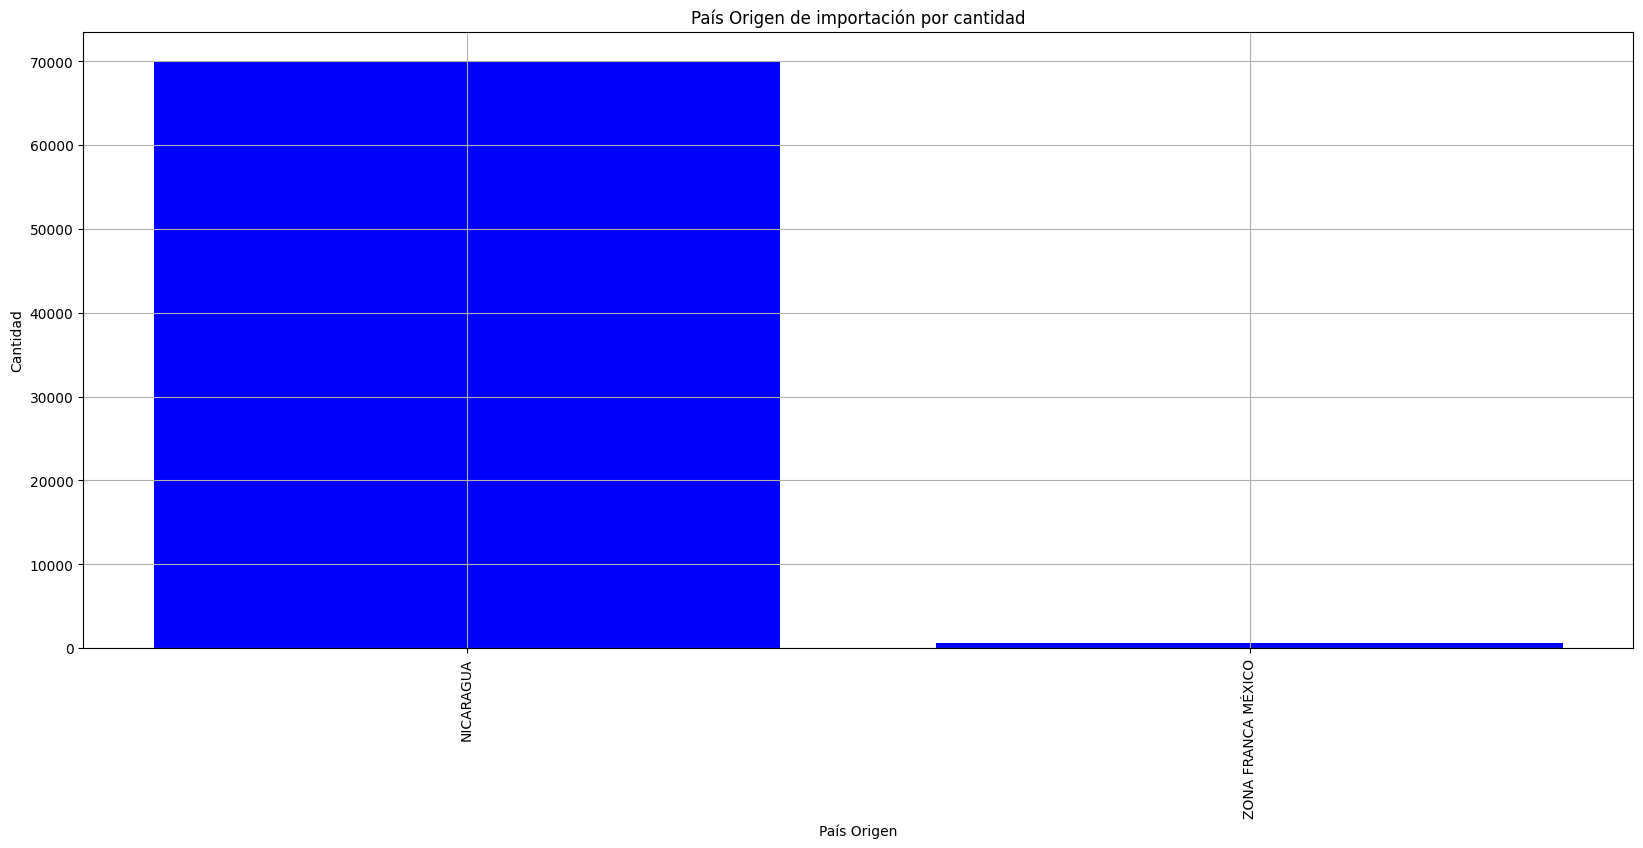

In [2]:
sum_by_pais = df.groupby('País Origen')['Qty 1'].sum().reset_index().sort_values(by='Qty 1', ascending=False)
print(sum_by_pais)

plt.figure(figsize = (20,8))

plt.bar(sum_by_pais['País Origen'], sum_by_pais['Qty 1'], color='blue')
plt.xlabel("País Origen")
plt.ylabel("Cantidad")
plt.title("País Origen de importación por cantidad")
plt.xticks(rotation=90)

plt.grid()
plt.show()

   Year    Qty 1
0  2019  20600.0
1  2020  25000.0
2  2021  25000.0


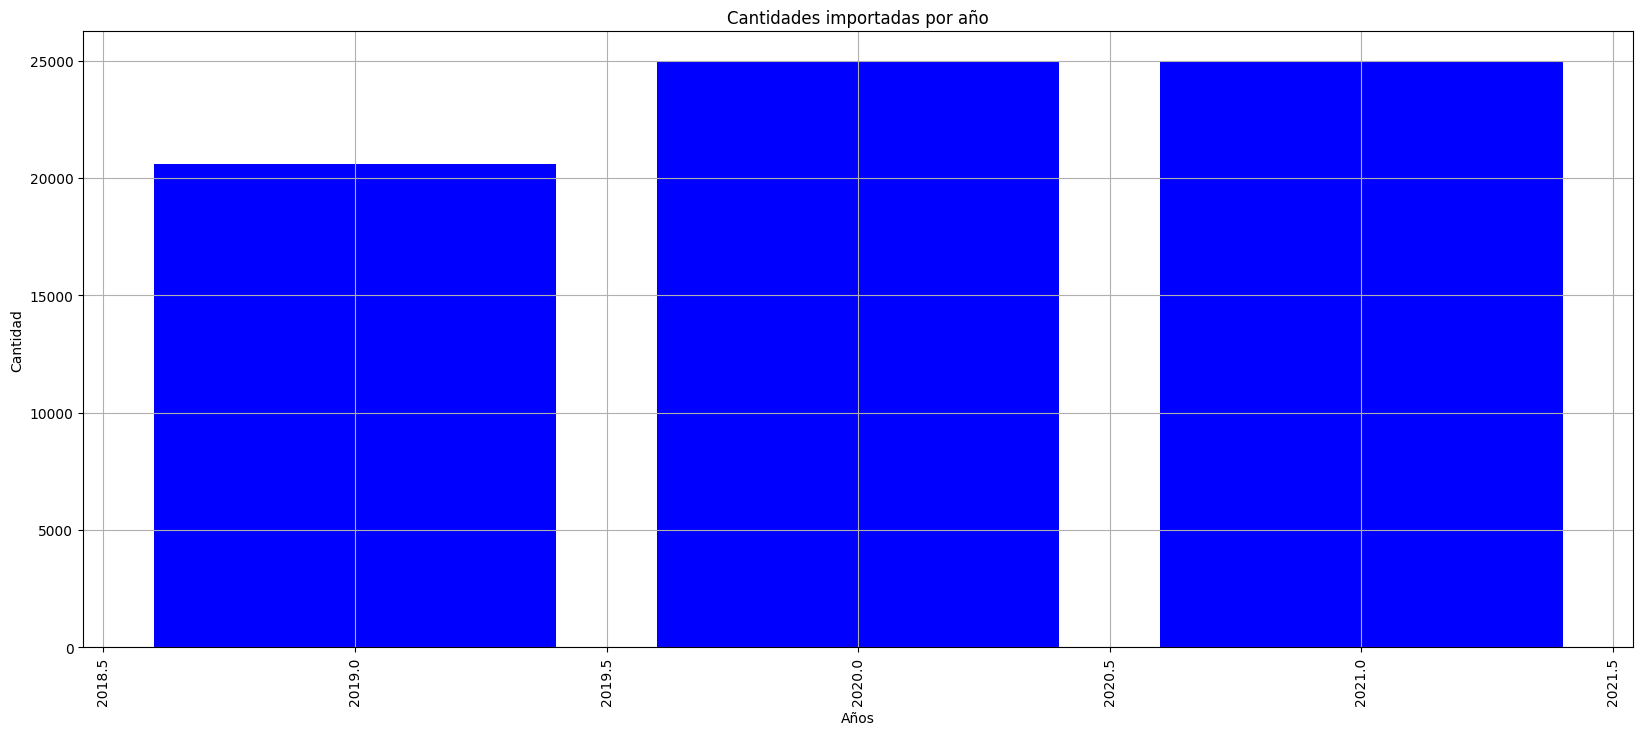

In [3]:
importacion_por_anio = df.groupby('Year')['Qty 1'].sum().reset_index()
print(importacion_por_anio)

plt.figure(figsize = (20,8))

plt.bar(importacion_por_anio['Year'], importacion_por_anio['Qty 1'], color='blue')
plt.xlabel("Años")
plt.ylabel("Cantidad")
plt.title("Cantidades importadas por año")
plt.xticks(rotation=90)

plt.grid()
plt.show()

Year  País Origen       
2019  NICARAGUA             20000.0
      ZONA FRANCA MÉXICO      600.0
2020  NICARAGUA             25000.0
2021  NICARAGUA             25000.0
Name: Qty 1, dtype: float64


<Axes: xlabel='Year,País Origen'>

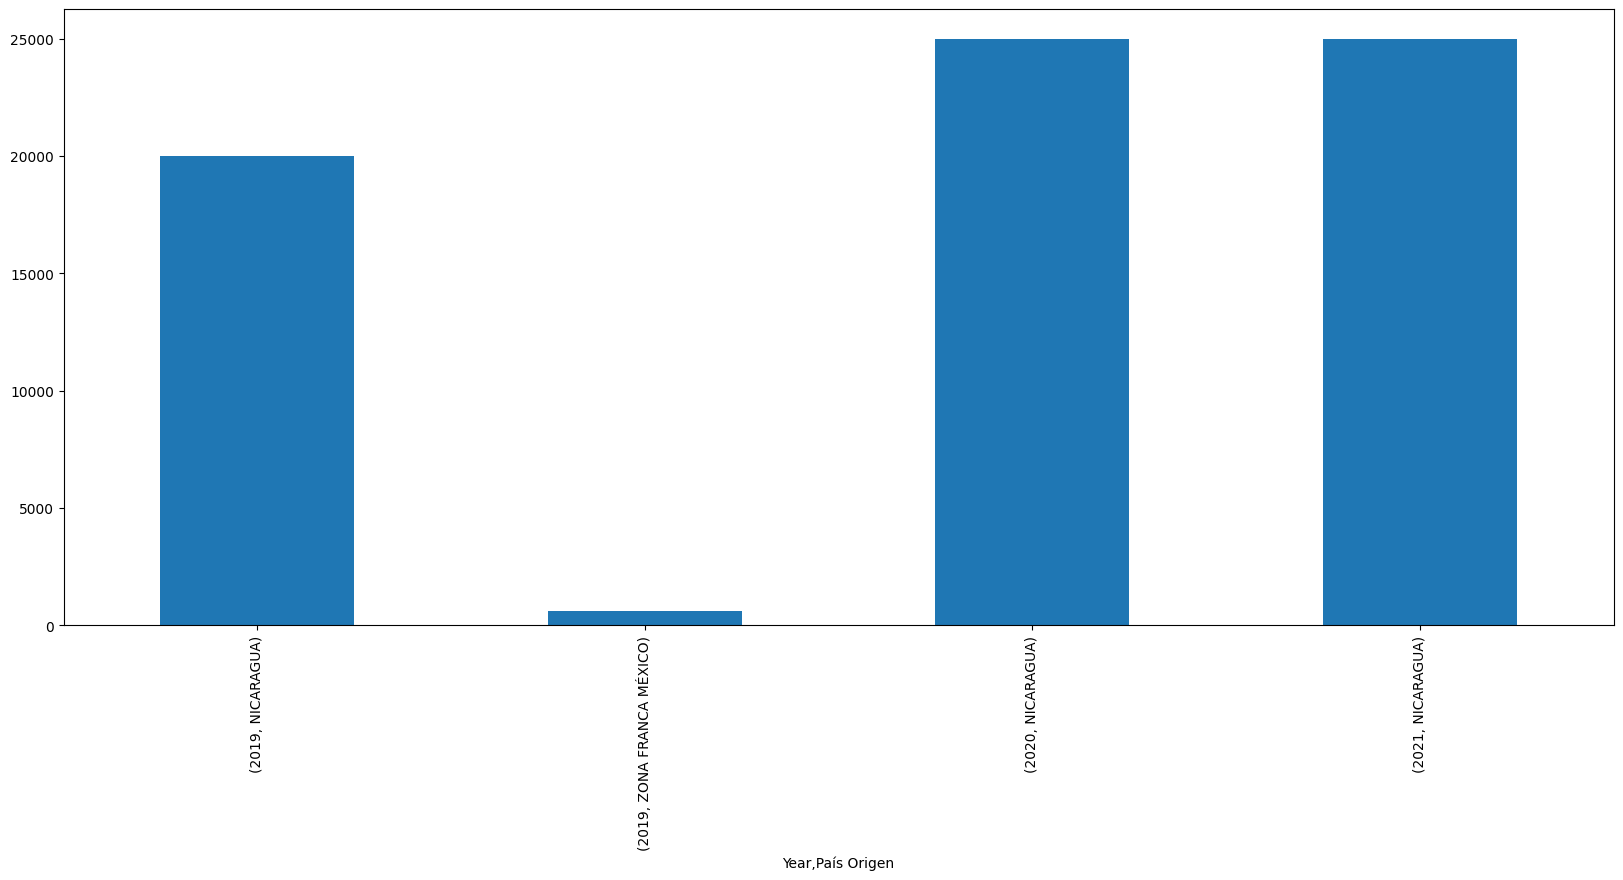

In [4]:
pais_por_anio = df.groupby(['Year','País Origen'])['Qty 1'].sum()
print(pais_por_anio)

fig = plt.figure(figsize = (20,8))
pais_por_anio.plot(kind="bar")

                               Descripción Comercial    Qty 1
2                      PEPINO DE MAR SECO FLORIDIANA  18000.0
3  PEPINO DE MAR SECO FLORIDIANA HOLOTURIA FLORID...  13000.0
5            PEPINO DE MAR SECO HOLOTURIA FLORIDIANA  11800.0
1  CAJAS CON PEPINO DE MAR SECO MEXICANA HOLTURIA...  10000.0
6              PEPINO DE MAR SECO HOLOTURIA MEXICANA   8200.0
7                        PEPINO DE MAR SECO MEXICANA   7000.0
0  CAJAS CON PEPINO DE MAR CAFE SECO ISOSTICHOPUS...   2000.0
4  PEPINO DE MAR SECO HOLOTHURIA MEXICANA PEPINO ...    600.0


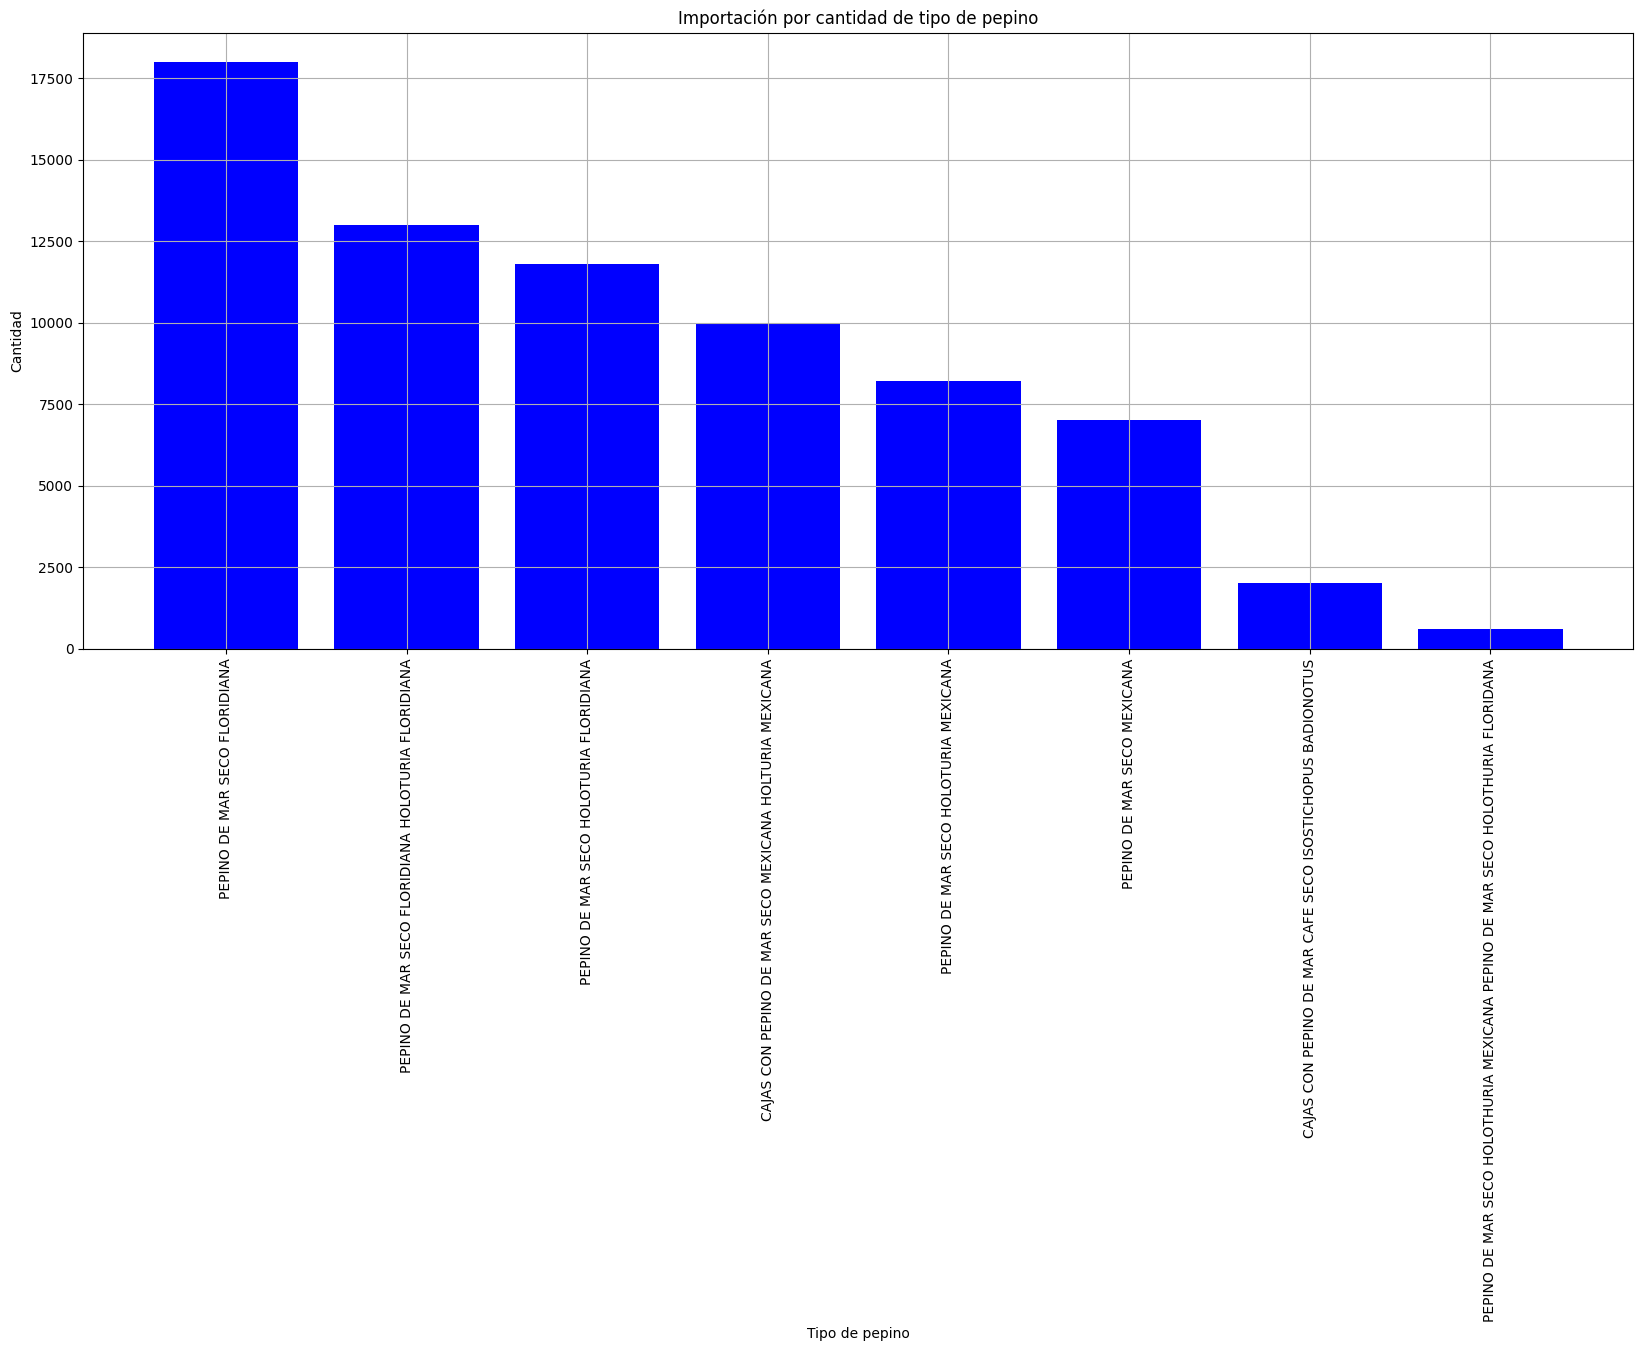

In [5]:
pp = df.groupby('Descripción Comercial')['Qty 1'].sum().reset_index().sort_values(by='Qty 1', ascending=False)
print(pp)

plt.figure(figsize = (20,8))

plt.bar(pp['Descripción Comercial'], pp['Qty 1'], color='blue')
plt.xlabel("Tipo de pepino")
plt.ylabel("Cantidad")
plt.title("Importación por cantidad de tipo de pepino")
plt.xticks(rotation=90)

plt.grid()
plt.show()

                                          Importador    Qty 1
2                            MARE CUCUMERIS SA DE CV  25000.0
3                                   Sin Razon Social  25000.0
0  DISTRIBUCION Y PROMOCION DE IMPORTACION Y EXPO...  20000.0
1         EXPORTADORA CAMPECHE STARFISH S.A. DE C.V.    600.0


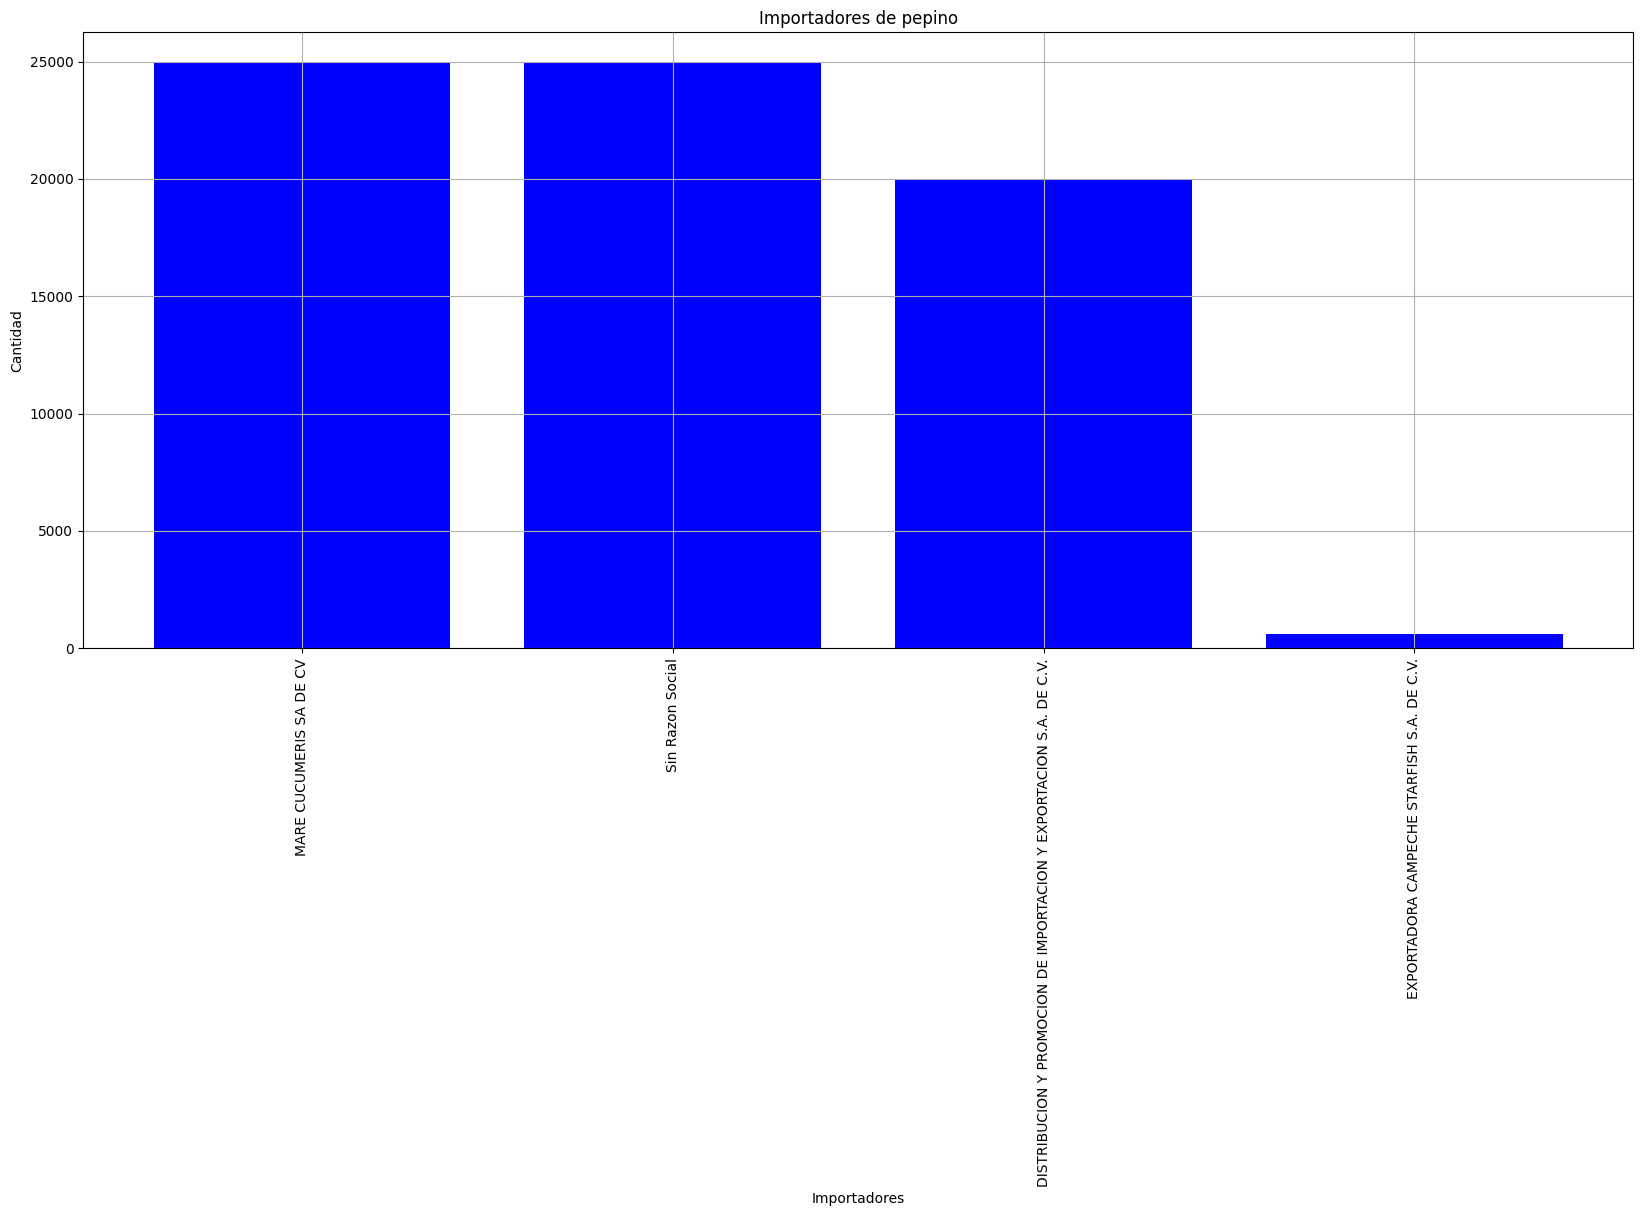

In [6]:
sum_by_pais = df.groupby('Importador')['Qty 1'].sum().reset_index().sort_values(by='Qty 1', ascending=False)
print(sum_by_pais)

plt.figure(figsize = (20,8))

plt.bar(sum_by_pais['Importador'], sum_by_pais['Qty 1'], color='blue')
plt.xlabel("Importadores")
plt.ylabel("Cantidad")
plt.title("Importadores de pepino")
plt.xticks(rotation=90)

plt.grid()
plt.show()

Year  Importador                                                        
2019  DISTRIBUCION Y PROMOCION DE IMPORTACION Y EXPORTACION S.A. DE C.V.    20000.0
      EXPORTADORA CAMPECHE STARFISH S.A. DE C.V.                              600.0
2020  Sin Razon Social                                                      25000.0
2021  MARE CUCUMERIS SA DE CV                                               25000.0
Name: Qty 1, dtype: float64


<Axes: xlabel='Year,Importador'>

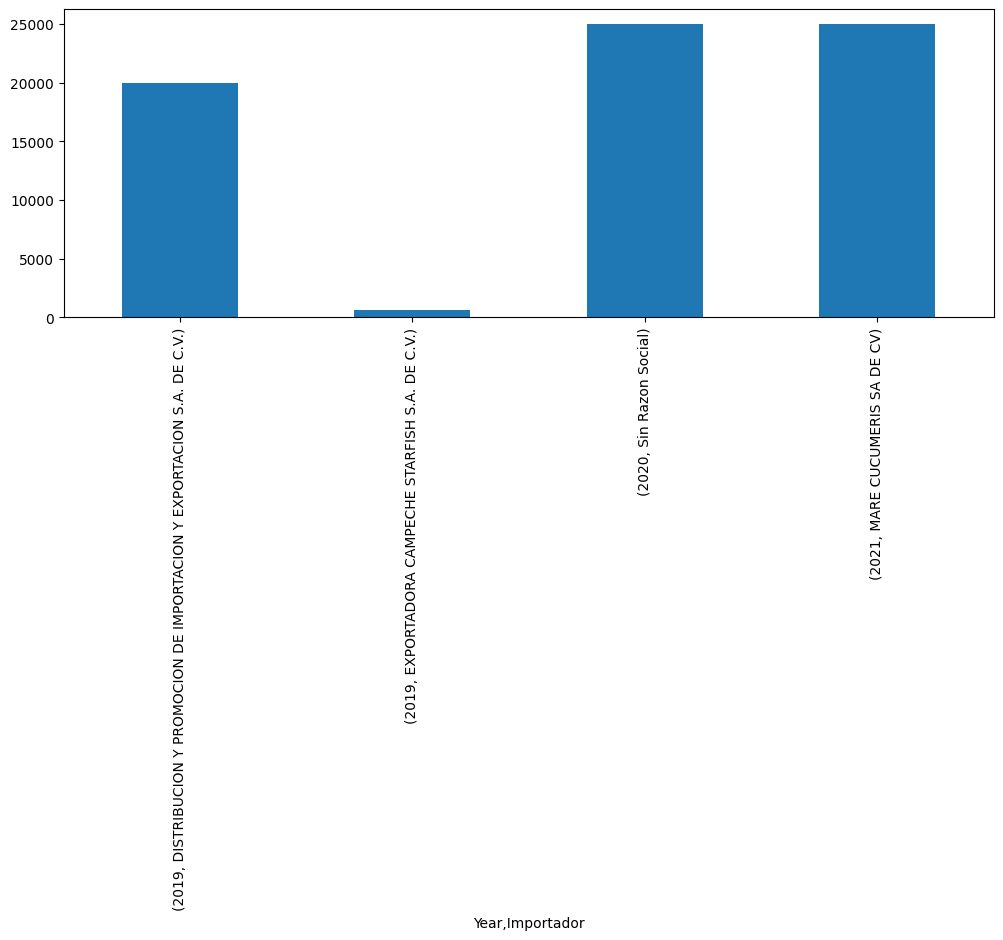

In [11]:
datosagraficar = df.groupby(['Year','Importador'])['Qty 1'].sum()
print(datosagraficar)
fig = plt.figure(figsize = (12,4))
datosagraficar.plot(kind="bar")